<a href="https://colab.research.google.com/github/RosaliaGimenezBDS/M9_Reto_01/blob/main/Reto_1_M09_Notebook_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Máster en Behavioral Data Science**
## **Instituto de Formación Continua (IL3) - Universitat de Barcelona**
## **Módulo 9: Aprendizaje Profundo - Reto 1** - (Notebook 2/5)
Autores: **Meysam Madadi** & **Julio C. S. Jacques Junior**

---

# **Prerrequisitos**
- Consultar las instrucciones en los *Jupyter notebooks* anteriores.
- Ejecutar los *Jupyter notebooks* anteriores, en este caso:
 - *Jupyter notebook* 1.

# **Los objetivos de este Jupyter notebook**
- Cargar los datos guardados en nuestro Google Drive;
- Entrenar nuestra red (ResNet) desde cero (es decir, ignorando los pesos pre-entrenados);
- Visualizar los resultados.
---

## Comprobando la versión de tensorflow

In [2]:
# Este código fue probado en tensorflow 2.15.0
# Por algún motivo la versión actual es 2.17.0 , ya que nos dió errores en el primer notebook forzamos la instalacion de la versión 2.15.0 de nuevo
!pip install tensorflow==2.15.0
import tensorflow as tf
print(tf.__version__)

2.15.0


# Montando nuestro Google Drive para guardar/cargar nuestros resultados

In [3]:
#--------------------------
MOUNT_GOOGLE_DRIVE = True
#--------------------------

if(MOUNT_GOOGLE_DRIVE==True):
  from google.colab import drive
  drive.mount('/content/gdrive')
  # Note, the default path will be: '/content/gdrive/MyDrive/'
  # In my case, the final path will be: '/content/gdrive/MyDrive/M09-P01/' as I
  # created a '/M09-P01/' folder in my google drive for this purpose.

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Cargando el modelo y los datos preprocesados desde Drive

In [4]:
import numpy as np
import tensorflow as tf

with open('/content/gdrive/MyDrive/M09-P01/train.npy', 'rb') as f:
  X_train = np.load(f)
  Y_train = np.load(f)
  M_train = np.load(f)
with open('/content/gdrive/MyDrive/M09-P01/valid.npy', 'rb') as f:
  X_valid = np.load(f)
  Y_valid = np.load(f)
  M_valid = np.load(f)
with open('/content/gdrive/MyDrive/M09-P01/test.npy', 'rb') as f:
  X_test = np.load(f)
  Y_test = np.load(f)
  M_test = np.load(f)

model = tf.keras.models.load_model('/content/gdrive/MyDrive/M09-P01/init_model.h5')


##############################################################
# creating a newly initialized model to train from scratch
#
model_from_scratch = tf.keras.models.clone_model(model)
#
##############################################################

# **Entrenando la red desde cero**
- El entrenamiento desde cero significa que **los pesos de la red se inicializan aleatoriamente**. Es decir, estamos usando una ResNet como arquitectura principal (o, como se dice, "backbone"), pero **no estamos haciendo ningún aprendizaje por transferencia**.
- A continuación, definimos el **optimizador**, la **función de pérdida**, las **métricas**, y construimos e iniciamos el **ciclo de entrenamiento** utilizando la función "fit".
- Por último, evaluamos el modelo en el conjunto de prueba y guardamos el historial y el mejor modelo en nuestro Goodl Drive.
 - Usamos el **error cuadrático medio (MSE) como función de pérdida** ('loss=tf.keras.losses.MeanSquaredError()'). El código también evalúa el error absoluto medio (MAE) durante el entrenamiento ('metrics=['mae']'). **La tasa de aprendizaje** se establece en 'learning_rate=1e-4', el **tamaño del lote** (batch size) = 32, y el modelo se entrenará durante 20 **epochs** (si Colab lo permite en función de los recursos disponibles).
 - El código está configurado para **guardar el mejor modelo** (save_best_only=True) **basado en "valid_loss"** (monitor='val_loss'). Es decir, si la pérdida de validación disminuye, en comparación con el modelo guardado anteriormente, se guarda un nuevo modelo en la ruta que hemos definimos.
 - Utilizamos **early stopping para evitar el sobreajuste**. Es decir, el modelo dejará de entrenarse si no se observa ninguna mejora en los últimos N=5 *epochs*. SE PARA EN EL EPOCH 40, LA PRIMERA VEZ SE HABÍA PARADO EN EL 46



In [5]:
  import pickle

  # defining the early stopping criteria
  es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
  # saving the best model based on val_loss
  mc = tf.keras.callbacks.ModelCheckpoint('/content/gdrive/MyDrive/M09-P01/best_model_from_scratch.h5', monitor='val_loss', mode='min', save_best_only=True)

  # defining the optimizer
  model_from_scratch.compile(tf.keras.optimizers.Adam(learning_rate=1e-3),loss=tf.keras.losses.MeanSquaredError(),metrics=['mae'])

  # training the model
  history = model_from_scratch.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), batch_size=32, epochs=50, shuffle=True, verbose=1, callbacks=[es,mc])

  # saving training history (for future visualization)
  with open('/content/gdrive/MyDrive/M09-P01/train_history_from_scratch.pkl', 'wb') as handle:
    pickle.dump(history.history, handle, protocol=pickle.HIGHEST_PROTOCOL)

Epoch 1/50
94/94 [==============================] - ETA: 0s - loss: 1.0811 - mae: 0.1567

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


94/94 [==============================] - 79s 459ms/step - loss: 1.0811 - mae: 0.1567 - val_loss: 0.7565 - val_mae: 0.1362
Epoch 2/50
94/94 [==============================] - 46s 489ms/step - loss: 0.5957 - mae: 0.1353 - val_loss: 0.4612 - val_mae: 0.1152
Epoch 3/50
94/94 [==============================] - 47s 500ms/step - loss: 0.3864 - mae: 0.1233 - val_loss: 0.3206 - val_mae: 0.1170
Epoch 4/50
94/94 [==============================] - 44s 466ms/step - loss: 0.2783 - mae: 0.1217 - val_loss: 0.2382 - val_mae: 0.1101
Epoch 5/50
94/94 [==============================] - 41s 433ms/step - loss: 0.2158 - mae: 0.1190 - val_loss: 0.2007 - val_mae: 0.1423
Epoch 6/50
94/94 [==============================] - 49s 519ms/step - loss: 0.1814 - mae: 0.1196 - val_loss: 0.1661 - val_mae: 0.1265
Epoch 7/50
94/94 [==============================] - 51s 548ms/step - loss: 0.1508 - mae: 0.1160 - val_loss: 0.1438 - val_mae: 0.1390
Epoch 8/50
94/94 [==============================] - 51s 545ms/step - loss: 0.132

# Visualizando la curva de entrenamiento (EN CADA ENTRENAMIENTO EL TRAZADO ES DIFERENTE)

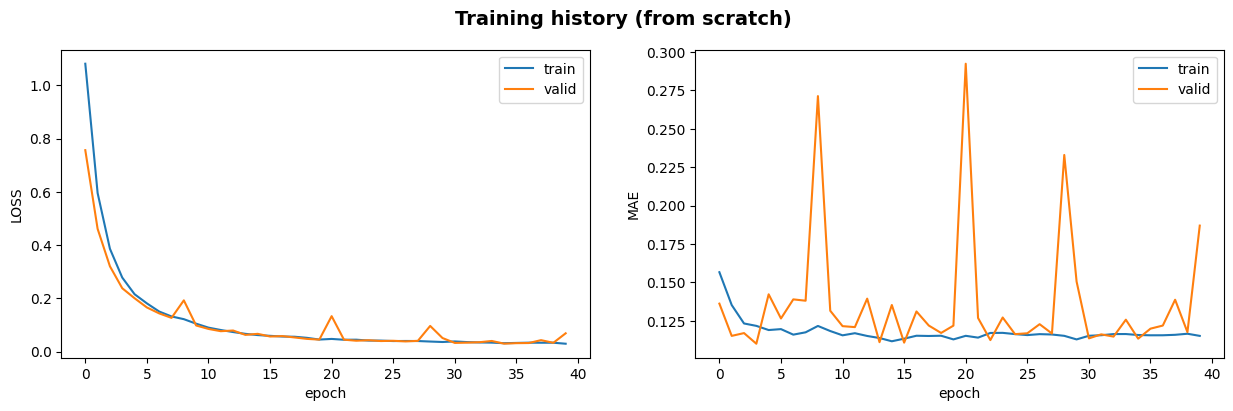

In [6]:
from matplotlib import pyplot as plt

# here, it loads the history of the model you trained before
train_hist = pickle.load(open('/content/gdrive/MyDrive/M09-P01/train_history_from_scratch.pkl',"rb"))

# we plot both, the LOSS and MAE
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
fig.suptitle('Training history (from scratch)', fontsize=14, fontweight='bold')

ax1.plot(train_hist['loss'])
ax1.plot(train_hist['val_loss'])
ax1.set(xlabel='epoch', ylabel='LOSS')
ax1.legend(['train', 'valid'], loc='upper right')

ax2.plot(train_hist['mae'])
ax2.plot(train_hist['val_mae'])
ax2.set(xlabel='epoch', ylabel='MAE')
ax2.legend(['train', 'valid'], loc='upper right')

# Evaluando el modelo entrenado en el conjunto de prueba

In [7]:
# loading the (best) saved model
model_from_scratch = tf.keras.models.load_model('/content/gdrive/MyDrive/M09-P01/best_model_from_scratch.h5')

# Evaluate the trained model on the test set
print('Evaluating on the test set')
predictions = model_from_scratch.predict(X_test, batch_size=32, verbose=1)

# Computing the Mean Absolute Error
# Also re-scaling the values to the range of "age" as the are in the range of [0,1]
mae = np.mean(abs(predictions[:,0] - Y_test)*100)

# Next, we print the average error. Note that the error is rescaled back to the range [0-100]
print('\nThe final mean absolute error (on the Test set)  is ' + str(mae) + ' years old.')

#Evaluating on the test set
#32/32 [==============================] - 3s 76ms/step
#The final mean absolute error (on the Test set)  is 13.676926054220425 years old.


Evaluating on the test set
32/32 [==============================] - 3s 76ms/step

The final mean absolute error (on the Test set)  is 13.676926054220425 years old.


# Imprimiendo algunas predicciones generadas

In [8]:
# printing some predictions and re-scaling the predicted values to the "age" range,
# using the normalization factor defined earlier, as the values are in
# the range of [0,1]
for i in range(0,10):
  print('predicted age = %.3f - Ground truth = %.3f' %(predictions[i]*100, Y_test[i]*100))

predicted age = 32.361 - Ground truth = 62.351
predicted age = 22.168 - Ground truth = 49.974
predicted age = 29.223 - Ground truth = 38.189
predicted age = 31.111 - Ground truth = 36.795
predicted age = 30.973 - Ground truth = 44.297
predicted age = 32.334 - Ground truth = 40.744
predicted age = 32.017 - Ground truth = 71.263
predicted age = 30.966 - Ground truth = 18.237
predicted age = 30.406 - Ground truth = 4.026
predicted age = 33.313 - Ground truth = 66.263


<ipython-input-8-0690d8d84d84>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted age = %.3f - Ground truth = %.3f' %(predictions[i]*100, Y_test[i]*100))


Posibles causas del mal rendimiento del modelo
Modelo subentrenado o arquitectura inadecuada:

Podría ser que tu modelo no tenga suficiente capacidad (es decir, no tiene suficientes neuronas o capas) para aprender adecuadamente las relaciones entre las características de entrada y la edad objetivo.
Asegúrate de que el modelo sea lo suficientemente complejo para el problema que estás tratando de resolver. Si es un modelo demasiado simple, podrías necesitar agregar más capas o neuronas.
Insuficiente cantidad de épocas o interrupción del entrenamiento:

Si el entrenamiento se interrumpió antes de que el modelo pudiera aprender adecuadamente, los resultados estarán lejos de ser óptimos. Asegúrate de que tu modelo tenga tiempo suficiente para entrenarse de manera adecuada.
Puedes revisar las curvas de pérdida (loss) en entrenamiento y validación para ver si el modelo ha dejado de mejorar. Si la pérdida todavía estaba mejorando, podrías necesitar entrenar más.
Problemas con los datos:

Asegúrate de que los datos estén correctamente escalados o normalizados. Si las características de entrada están en rangos muy diferentes, el modelo puede tener dificultades para aprender relaciones significativas.
Verifica que los datos de entrenamiento y prueba estén bien distribuidos. Si el modelo está entrenado solo con un subconjunto limitado de edades, puede tener dificultades para generalizar a edades que no ha visto.
Sobreajuste (overfitting):

Es posible que el modelo esté sobreajustado al conjunto de entrenamiento, especialmente si las predicciones están agrupadas en un rango pequeño. Esto sucede cuando el modelo aprende demasiado bien los datos de entrenamiento pero no generaliza a los datos de prueba.
Si sospechas que este es el caso, podrías probar con técnicas de regularización como Dropout o L2 regularization.
Posibles soluciones
Revisar el entrenamiento:

Asegúrate de que el modelo ha entrenado durante un número suficiente de épocas. Si usaste early stopping, revisa si detuvo el entrenamiento demasiado pronto.
Revisa las curvas de entrenamiento (pérdida y métricas) para detectar problemas como el sobreajuste o subentrenamiento.
Ajuste del modelo:

Si el modelo es demasiado simple, considera agregar más capas o aumentar el número de neuronas.
Intenta ajustar el tasa de aprendizaje (learning rate). A veces, un valor inapropiado puede hacer que el modelo no aprenda de manera efectiva.
Revisar los datos:

Asegúrate de que los datos de entrada estén normalizados correctamente.
Revisa si hay algún sesgo en los datos, como conjuntos de edades que podrían estar infrarepresentados.
Probar con más regularización:

Si crees que el modelo está sobreajustado, puedes añadir Dropout o regularización L2 para mejorar la generalización.
Mejorando las predicciones
Si el entrenamiento y los datos están en orden, pero las predicciones siguen siendo incorrectas, prueba ajustar los hiperparámetros del modelo o cambiar la arquitectura. También puedes usar técnicas como cross-validation para verificar cómo se desempeña el modelo en diferentes subconjuntos del conjunto de datos.